In [1]:
#Dependencies
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data_csv = pd.read_csv("student-mat.csv", sep=";")
data_df = pd.DataFrame(data_csv)
data_df
#LEGEND:
#M/Fedu - Education for parents: 0-none, 1-primary, 2-grade 5 to 9, 3-secondary edu, 4-higher edu
#abscenses - total abscenses: 0-93
#studytime - weekly study time: 1-<2 hours, 2-2to5hr, 3-5to10hr, 4->10hr
#internet - Internet access at home Y/N = 0/1
#activities - extracurricular activities Y/N = 0/1
#Pstatis - living together or apart T/A = 0/1
#romantic - in a relationship Y/N = 0/1
#paid - extra paid classes related to course Y/N = 0/1
#famrel - Family Relation Status 1(very bad)-5(excellent) 
#sex - M/F = 0/1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
#Create new dataframe, keeping only the columns we are interested in
data = data_df[["G1","G2","G3","sex", "Medu", "Fedu", "absences", "internet", "studytime", "failures", "activities", "Pstatus", "romantic", "paid","famrel"]]
data1 = pd.DataFrame(data)
#Replacing str values with 0 and 1 to make it readable for the linear regression model
data1.replace('F',1,inplace=True)
data1.replace('M',0,inplace=True)
data1.replace('yes',0,inplace=True)
data1.replace('no',1,inplace=True)
data1.replace('A',1,inplace=True)
data1.replace('T',0,inplace=True)
data2 = data.copy()
data_binary = pd.get_dummies(data2, columns=["sex", "internet", "activities", "Pstatus", "romantic", "paid"])
pd.set_option('max_columns', None)
data_binary.head()

,G1,G2,G3,Medu,Fedu,absences,studytime,failures,famrel,sex_1,sex_M,internet_no,internet_yes,activities_no,activities_yes,Pstatus_A,Pstatus_T,romantic_no,romantic_yes,paid_no,paid_yes
0,5,6,6,4,4,6,2,0,4,1,0,1,0,1,0,1,0,1,0,1,0
1,5,5,6,1,1,4,2,0,5,1,0,0,1,1,0,0,1,1,0,1,0
2,7,8,10,1,1,10,2,3,4,1,0,0,1,1,0,0,1,1,0,0,1
3,15,14,15,4,2,2,3,0,3,1,0,0,1,0,1,0,1,0,1,0,1
4,6,10,10,3,3,4,2,0,4,1,0,1,0,1,0,0,1,1,0,0,1


In [4]:
data_binary.rename(columns={"sex_1": "sex_f", "sex_M": "sex_m"})


,G1,G2,G3,Medu,Fedu,absences,studytime,failures,famrel,sex_f,sex_m,internet_no,internet_yes,activities_no,activities_yes,Pstatus_A,Pstatus_T,romantic_no,romantic_yes,paid_no,paid_yes
0,5,6,6,4,4,6,2,0,4,1,0,1,0,1,0,1,0,1,0,1,0
1,5,5,6,1,1,4,2,0,5,1,0,0,1,1,0,0,1,1,0,1,0
2,7,8,10,1,1,10,2,3,4,1,0,0,1,1,0,0,1,1,0,0,1
3,15,14,15,4,2,2,3,0,3,1,0,0,1,0,1,0,1,0,1,0,1
4,6,10,10,3,3,4,2,0,4,1,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,2,2,5,0,1,1,0,1,0,1,0,1,0,0,1
391,14,16,16,3,1,3,1,0,2,0,1,0,1,1,0,0,1,1,0,1,0
392,10,8,7,1,1,3,1,3,5,0,1,1,0,1,0,0,1,1,0,1,0
393,11,12,10,3,2,0,1,0,4,0,1,0,1,1,0,0,1,1,0,1,0


In [5]:
#Linear Regression model
predict = "G3"
x = np.array(data_binary.drop([predict], 1))
y = np.array(data_binary[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = .2, random_state=8)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)
print(linear.coef_)
print(linear.intercept_)

0.9005388034835672
[ 0.17669579  0.96403809  0.11804378 -0.12349377  0.03696995 -0.11027801
 -0.11602229  0.31145409 -0.02617281  0.02617281  0.07926368 -0.07926368
  0.1774553  -0.1774553   0.16919663 -0.16919663  0.20323409 -0.20323409
 -0.05138488  0.05138488]
-2.97265380966628


In [6]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
#How to read: EV[G1, G2, sex, Medu, Fedu, abscences, internet, studytime, failures, activities, Pstatus, romantic, paid, famrel]AV
#EV - Expected Value, AV - Actual Value

13.570036150590468 [12 14  3  1  1  3  0  3  1  0  0  1  1  0  0  1  1  0  1  0] 15
8.115542019973267 [8 9 1 2 4 2 0 3 0 1 1 0 1 0 0 1 1 0 1 0] 10
8.854931815428836 [10 10  4  3  0  2  0  4  1  0  0  1  0  1  0  1  0  1  1  0] 10
14.051191727623152 [15 13  4  4  9  2  0  5  0  1  0  1  0  1  1  0  1  0  0  1] 15
5.4719257992449055 [5 6 4 4 6 2 0 4 1 0 1 0 1 0 1 0 1 0 1 0] 6
4.423595856548042 [8 6 1 1 2 2 2 3 1 0 0 1 1 0 0 1 0 1 1 0] 5
9.501097847389087 [ 9  9  2  2 11  2  2  5  0  1  1  0  1  0  1  0  1  0  0  1] 9
7.113801641047955 [ 8  8  3  3 10  4  0  4  1  0  0  1  0  1  0  1  1  0  0  1] 8
9.200660548116922 [ 6 10  3  3  4  2  0  4  1  0  1  0  1  0  0  1  1  0  0  1] 10
-0.9345771894783663 [7 0 1 2 0 1 1 4 0 1 1 0 0 1 0 1 1 0 1 0] 0
-0.8425251237557139 [11  0  4  4  0  3  0  4  1  0  0  1  0  1  0  1  0  1  1  0] 0
18.887748723942277 [16 18  3  2  0  2  0  4  0  1  0  1  1  0  1  0  1  0  0  1] 19
12.92593230697126 [12 13  2  2  2  2  0  4  1  0  0  1  1  0  0  1  1  0  0  1] 13

In [7]:
style.use("ggplot")

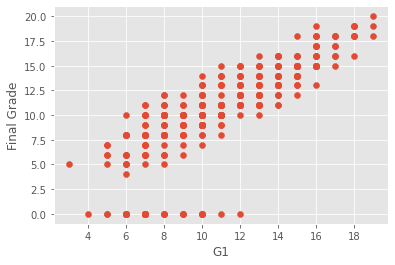

0.6423508460522716


In [38]:
p = "G1"
x = data[p]
y= data["G3"]
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)


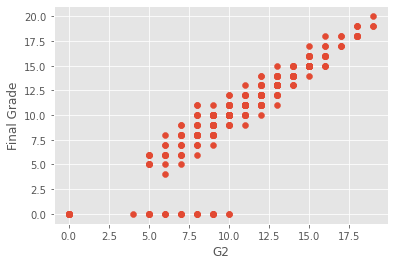

0.8187860780042681


In [42]:
p = "G2"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

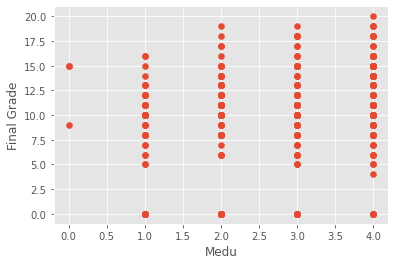

0.04715303507926591


In [41]:
p = "Medu"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

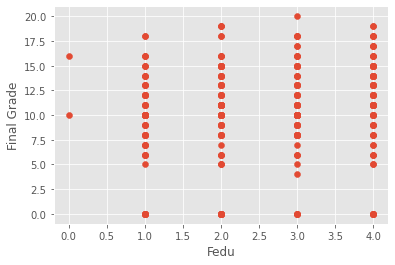

0.023243118220056966


In [43]:
p = "Fedu"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

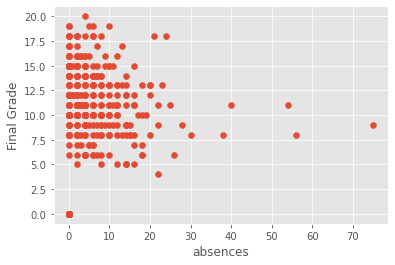

0.0011728786634827987


In [44]:
p = "absences"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

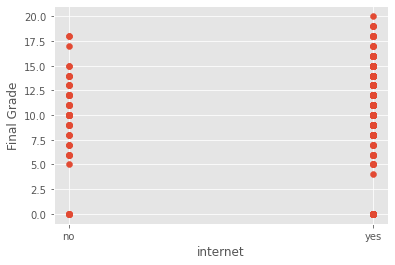

In [46]:
p = "internet"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()


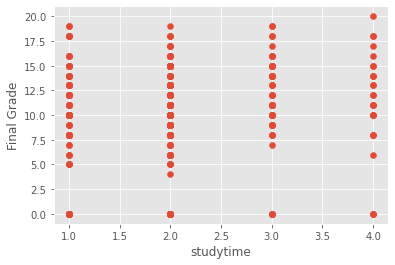

0.00956869168384764


In [47]:
p = "studytime"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

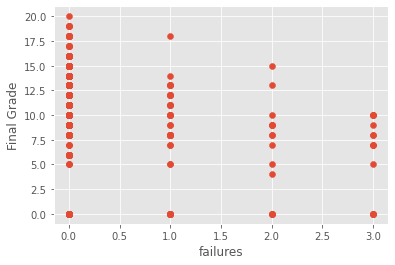

0.12989892930797448


In [48]:
p = "failures"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

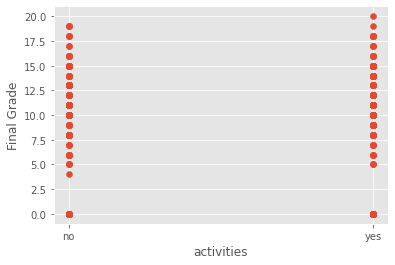

In [50]:
p = "activities"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()


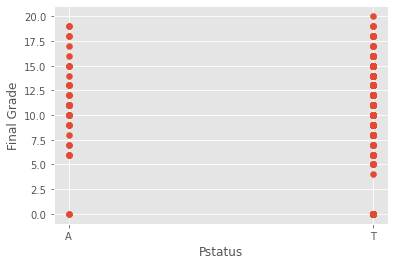

In [24]:
p = "Pstatus"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

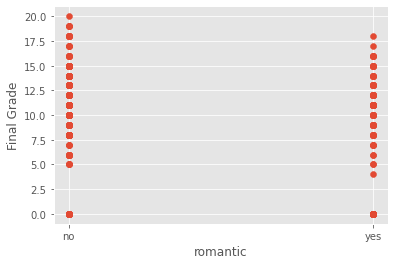

In [25]:
p = "romantic"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

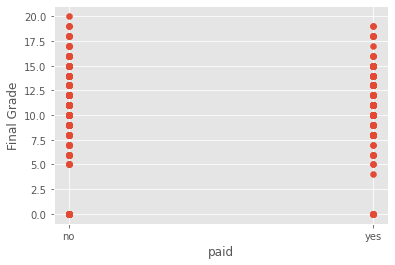

In [26]:
p = "paid"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

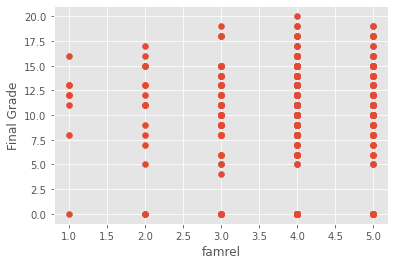

0.002638201826442527


In [51]:
p = "famrel"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
x = data[p]
y = data["G3"]
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)